In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
read= pd.read_csv('/Users/HP/Desktop/archive/output.csv')

In [81]:
read

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No


In [83]:
read['Sex'].value_counts()

Sex
M     29
M     26
F     26
F     23
Name: count, dtype: int64

In [85]:
def new_sex(sex):
    if sex[0]=='M':
        return '1'
    else:
        return '0'

In [87]:
read['Sex']= read['Sex'].apply(new_sex)

In [89]:
read['Sex'].value_counts()

Sex
1    55
0    49
Name: count, dtype: int64

In [91]:
X= read.drop('Anaemic',axis=1)
Y= read['Anaemic']

In [93]:
from sklearn.model_selection import train_test_split

In [160]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=101)

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
dtree= DecisionTreeClassifier()

In [166]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [168]:
predictions= dtree.predict(X_test)

In [170]:
from sklearn.metrics import classification_report,confusion_matrix

In [172]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        17
         Yes       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [174]:
print(confusion_matrix(Y_test,predictions))

[[17  0]
 [ 0  4]]


In [176]:
np.array(predictions)

array(['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [178]:
X_test

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb
37,38,1,47.2275,28.2526,24.5199,12.8
1,2,0,45.6033,28.1900,26.2067,13.5
100,101,1,42.2324,30.6757,27.0919,6.3
54,55,1,46.0477,28.6476,25.3047,14.4
93,94,1,47.7549,26.2457,25.9994,15.2
47,48,1,45.7581,27.2867,26.9553,11.8
41,42,1,47.9777,26.7981,25.2242,16.3
45,46,1,46.9428,27.2219,25.8353,13.3
58,59,1,40.6395,32.1891,27.1714,2.8
32,33,1,42.1652,29.3907,28.4441,13.4


In [180]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(read.columns[1:])
features

['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Anaemic']

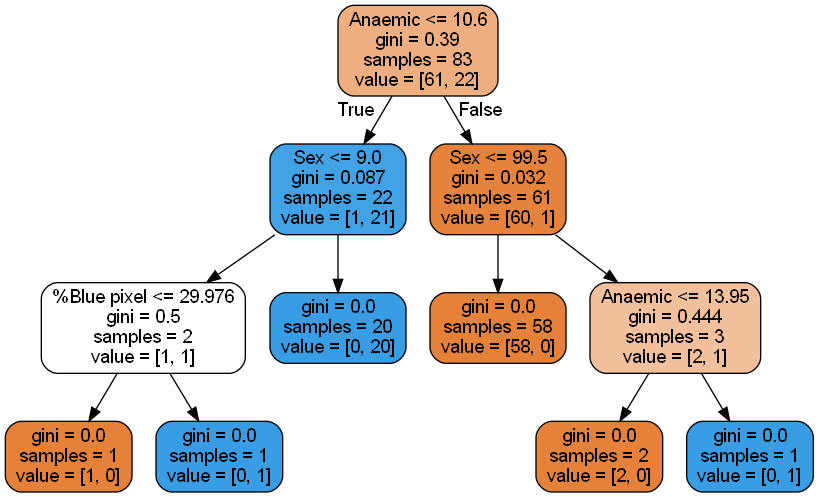

In [182]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [183]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [184]:
rfc_pred= rfc.predict(X_test)

In [188]:
print(confusion_matrix(Y_test,rfc_pred))

[[17  0]
 [ 0  4]]


In [190]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        17
         Yes       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

